In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #不能运行的话改成SimHei
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

Missing colon in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 (' 中文字体')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 759 ('font.family: sans-serif')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 760 ('font.sans-serif: Arial Unicode MS, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 761 ('axes.unicode_minus: False')


# 原始数据

In [3]:
x = np.array([0,0.5,0.7,0.8,0.85,0.9,0.95,1.0,
              1.05,1.1,1.15,1.2,1.25,1.3,1.35,
              1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.8,2.0,3.0])
y = np.array([100,100,100,99,99,98,94,87,77,65,
              54,43,33,26,18,13,8,5,3,2,1,0,0,1,1])

# 分成三段拟合，第一、三段为直线，第二段为四次多项式

In [4]:
f1 = np.polyfit(x[:4], y[:4], 1)
xfit1 = np.linspace(0, 0.9, 10)
yfit1 = np.polyval(f1, xfit1)

In [5]:
f2 = np.polyfit(x[3:-3], y[3:-3], 4) # 采用4次多项式拟合，f2为参数，np.array类型
xfit2 = np.linspace(0.9, 1.6, 500)
yfit2 = np.polyval(f2, xfit2) # 得到拟合后的结果，np.array类型

In [6]:
f3 = np.polyfit(x[-2:],y[-2:], 1)
xfit3 = np.linspace(1.6, 3, 10)
yfit3 = np.polyval(f3, xfit3)

# 找到透射率最接近10%和90%的点

In [7]:
x_10 = xfit2[np.abs(yfit2-10)<0.1]
y_10 = yfit2[xfit2==x_10]
x_90 = xfit2[np.abs(yfit2-90)<0.1]
y_90 = yfit2[xfit2==x_90]
print(x_10,x_90)

[1.4246493] [0.9743487]


# 画图

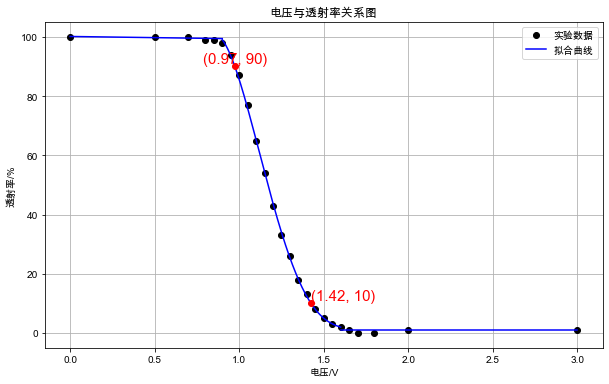

In [9]:
plt.figure(figsize=(10,6))
plt.title(r"电压与透射率关系图")
plt.ylabel(r"透射率/%")
plt.xlabel(r"电压/V")
plt.grid()
plt.plot(x, y, 'ok', label="实验数据")
plt.plot(xfit1, yfit1, color='b')
plt.plot(xfit2, yfit2, color='b', label="拟合曲线")
plt.plot(xfit3, yfit3, color='b')
plt.plot(x_10, y_10, "or")
plt.plot(x_90, y_90, "or")
plt.text(x_10, y_10, (float(x_10.round(2)), 10),ha='left', va='bottom', fontsize=15, color="r")
plt.text(x_90, y_90, (float(x_90.round(2)), 90),ha='center', va='bottom', fontsize=15, color="r")
plt.legend()
plt.savefig("液晶电光效应研究.jpg",dpi=150)